<img src="images/TRU_Logo_Horizontal_RGB-colour37470.png" width=600 />
<!-- The line above is html code. This line is html comment, it won't affect the output -->

# Physics 2200 - Mechanics
## Project 4 - Orbital Motion

In [107]:
# Required modules
import math
import matplotlib.pyplot as plt
import PhysPlot
import numpy as np
import csv
from mpl_toolkits import mplot3d

## Newton's Law of Gravitation, and Kepler's Laws of Planetary Motion

Newton's Law of Gravitation gives the gravitational force which two objects exert on each other.

$$\vec{F} = G\frac{mM}{r^2}\hat{r}$$

The issue here is that this is the polar form of the equation, the "nice" version. However, polar coordinates are not ideal for numerical calculations because the basis vector change everytime the position changes, so we need to first convert the equation into cartesian. Hold on to your hats kids.

Recall that:

$$r^2 = x^2 + y^2$$
$$\theta = \tan^{-1}\left(\frac{y}{x}\right)$$

and 

$$\hat{r} = \frac{\vec{r}}{|\vec{r}|}$$

with $\vec{r} = x\hat{x} + y\hat{y}$

Some clever combining yields the follwing not nice equation

#### Newton's Law of Gravitation, Cartesian Form

$$\vec{F} = GmM\left(\frac{x\hat{x}}{(x^2 + y^2)^{3/2}} + \frac{y\hat{y}}{(x^2 + y^2)^{3/2}}\right)$$

The textbook uses a much more horrific version of the equation, which deals with the separation vector $r_{12} = (x_2 - x_1) \hat{x} + (y_2 - y_2) \hat{y}$, but we're going to assume the origin is both the location of the star and the location of the focus of the elliptical orbit.

## Problem 1. Types of orbits (1 point).
Using Newton's Law of Gravitation, solve for the trajectory of a planet orbitting a star using the second order Runge-kutta method (RK2). 

Generate numerical solutions and plots for each of the different types of "orbits" by changing the initial conditions. You should try to recreate figure 6.5.2.e in the textbook. Notice you have to solve for the orbit by numerical integration (you should not simply plot analytical expression for an ellipse, parabola, etc...).

1. Elliptical
2. Parabolic
3. Hyperbolic

The conditions required for each orbit type is known from class, and to generate certain plots, you'll need to use negative time for a proper plot (*Hint: there should be only one parameter that changes in each case*).

Here is what my plot looks like (don't worry about making the dots representing the planet and the star).

<img src="images/p4_p1.jpg" width=500 style="float:left"/>

In [108]:
# rk2 function that takes in the acceleration as a function in terms of position, velocity, and time.
# Uses it to compute one iteration of the rk2 method 
# from p3 reusing here

def rk2(afunc,xi,vi,ti,dt):
    a = afunc(vi,xi,ti)
    tt = ti + dt/2
    xt = xi + vi*dt/2
    vt = vi + a*dt/2
    at = afunc(vt,xt,tt)
    vf = vi + at*dt
    xf = xi + vt*dt
    
    return xf, vf
    

In [109]:
# combine planet plot sun marker and multiplot to plot multiple planet trajectories and sun marker
def modifiedPlanetPlot(xAxis, yAxes, ylbls, xTitle, yTitle):
    plt.figure(figsize=(10, 10))
    plt.plot(0, 0, color = 'y', marker='.', markersize=20)
    multy_x = isinstance(xAxis[0], (list, np.ndarray))
    for ii in range(len(yAxes)):
        if multy_x:
            # Assume there is an idependent axis for each dependent one
            plt.plot(xAxis[ii], yAxes[ii], label=ylbls[ii])
        else:
            # Assume all plots share the same dependent axis
            plt.plot(xAxis, yAxes[ii], label=ylbls[ii])
    plt.xlabel(xTitle)
    plt.ylabel(yTitle)
    plt.grid()
    plt.legend(loc="best")

I changed all the numbers to be in terms of AU, solar masses $M_\odot$, and years to simplyfy the math and make the plot axes look nicer.

In [110]:
s2yr = 365*24*60*60 # number of s in 1 yr for conversions, 365 d/y * 24 h/d * 60 m/h * 60 s/m

# constants used (https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html)

Msunkg = 1.9885 * 10**30 # kg
Mearthkg = 5.9724 * 10**24 # kg
Gconst = 6.67408 * 10**(-11) # gravitational constant
AU = 1.496 * 10**11 # m, 1 AU, orbital radius of earth around sun
vearth = 2.978 * 10**4 # m/s

Msun = 1
vAU = vearth*s2yr/AU
vAU = 2*np.pi
G = 39.478 # AU^3 * yr^-2 * Msun^-1

The force equation for Newton's law of gravitation above was divided by the mass of the planet $(m)$ to get the acceleration of the planet,

$$\vec{a} = - GM\left(\frac{x\hat{x}}{(x^2 + y^2)^{3/2}} + \frac{y\hat{y}}{(x^2 + y^2)^{3/2}}\right)$$.

This was implimented as an acceleration function to use with my rk2 fucntion.

In [111]:
# newtons law of gravitation, only in terms of star mass to get planetary acceleration, assuming star position is constant
# acts on 2d x array with x in [0] and y in [1]

def NLG(vi,xi,ti):
    a = np.zeros(len(xi))
    a[0] = - G * Msun * xi[0] / (xi[0]**2 + xi[1]**2) ** (3/2)
    a[1] = - G * Msun * xi[1] / (xi[0]**2 + xi[1]**2) ** (3/2)
    return a

The velocity for the parabolic tragectory was found combinaing the gravitational potential energy,

$ V = \frac{GMm}{r^2}$

and 

$ K = \frac{1}{2}mv^2$.

Where the total energy is 0,

$ 0 = V - K = \frac{GMm}{r^2} - \frac{1}{2}mv^2$,

$ \frac{GMm}{r^2} = \frac{1}{2}mv^2$,

and finally,

$ v^2 = \frac{2GM}{r^2}$.

Subtituting in the numbers:

$ v^2 = \frac{2G M_\odot}{1 AU}$.

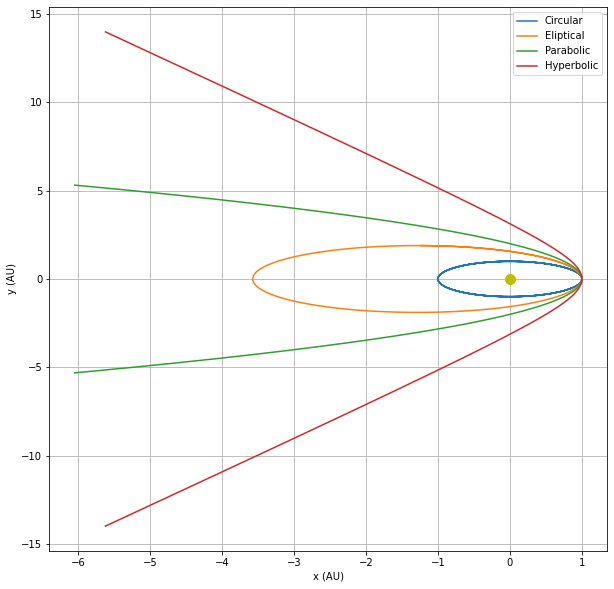

In [112]:
vy0 = - vearth*1.5 # inital speed in m/s (average orbital speed of earth), decreased for eliptical orbit
vx0 = 0
x0 = AU # inital x, increased for eliptical orbit 
y0 = 0 # inital y, set to 0 since starting on x axis
dt = 0.1/365 # 1 timestep per day
tf = 4 # yr

# time array
t = np.arange(0,tf,dt)
# 2D arrays for position and velocity in x and y
xcirc = np.zeros((len(t),2))
vcirc = np.zeros((len(t),2))
xelip = np.zeros((len(t),2))
velip = np.zeros((len(t),2))
xpar = np.zeros((len(t),2))
vpar = np.zeros((len(t),2))
xhyp = np.zeros((len(t),2))
vhyp = np.zeros((len(t),2))

# set inital conditions, all will begin with earths distance from the sun and some velocity
# circular orbit with earthsvelocity and radius
xcirc[0,:] = [1, 0]
vcirc[0,:] = [0,vAU]

# eliptical orbit with higher inital velocity than earth 
xelip[0,:] = [1, 0]
velip[0,:] = [0,vAU*1.25]

# parabolic, close to star has kinetic energy equal to gravitational energy so total energy is 0
v0par = np.sqrt(2*G)

xpar[0,:] = [1, 0]
vpar[0,:] = [0,v0par]

# hyperbolic, higher kinetic energy than gravitational 
xhyp[0,:] = [1, 0]
vhyp[0,:] = [0,v0par*1.25]

# for loop for finding initial position for parabolic and hyperbolic runs for half of total time with opposite of inital velocity
for i in range((len(t) - 1)//2):
    xpar[i + 1,:], vpar[i + 1,:] = rk2(NLG, xpar[i,:], vpar[i,:], t[i], dt)
    xhyp[i + 1,:], vhyp[i + 1,:] = rk2(NLG, xhyp[i,:], vhyp[i,:], t[i], dt)

# parabolic
xpar[0,:] = xpar[i+1,:]
vpar[0,:] = - vpar[i+1,:]

# hyperbolic
xhyp[len(t)%2,:] = xhyp[i+1,:]
vhyp[len(t)%2,:] = - vhyp[i+1,:]

# numerical for loop
for i in range(len(t) -1):
    xcirc[i + 1,:], vcirc[i + 1,:] = rk2(NLG, xcirc[i,:], vcirc[i,:], t[i], dt)
    xelip[i + 1,:], velip[i + 1,:] = rk2(NLG, xelip[i,:], velip[i,:], t[i], dt)
    xpar[i + 1,:], vpar[i + 1,:] = rk2(NLG, xpar[i,:], vpar[i,:], t[i], dt)
    xhyp[i + 1,:], vhyp[i + 1,:] = rk2(NLG, xhyp[i,:], vhyp[i,:], t[i], dt)

# PhysPlot.plot(xelip[:,0]/AU, xelip[:,1]/AU, "x (AU)","y (AU)")

modifiedPlanetPlot([xcirc[:,0], xelip[:,0], xpar[:,0], xhyp[:,0]], [xcirc[:,1], xelip[:,1], xpar[:,1], xhyp[:,1]], ["Circular", "Eliptical", "Parabolic", "Hyperbolic"], "x (AU)","y (AU)")

# PhysPlot.plot(t, E, r"Time ($t,$ $s$)", r"Energy ($E,$ $J$)")
# PhysPlot.multiplot([x[0:i], xa[0:nodragstop], xalindrag[0:i]], [z[0:i], za[0:nodragstop], zalindrag[0:i]], ["Numerical", "Analytic - no drag", "Analytic - drag"], "x (m)", "z (m)")

# parabolara is where energy of the system = 0

## Problem 2. Verify Kepler's Laws of Planetary Motion (4 points)
Using Newton's Law of Gravitation, solve for the trajectory of a planet orbitting a star using the second order Runge-kutta method (RK2). The initial conditions are yours to choose, as well as the parameters, but make sure the resulting orbit is elliptical. Make sure you run the integration for a full oscillation, so the planet returns to its (approximate) original position.

Kepler's Laws are:

#### 1) Law of Ellipses: The orbit of a planet is an ellipse with the Sun at one of its foci (2points).

For this part you should:

1) Plot the orbit you obtained ($x \times y$).

2) Calculate the kinetic energy, the potential energy, the total energy and the angular momentum for every time step. Recall that:

$$E = \frac{1}{2}mv^2 + V$$
$$L = \vec{r} \times m\vec{v}$$

3) Plot the three energies (total, potential and kinetic) in a single graph as a function of time. Is the total energy conserved?

4) Plot the total angular momentum as a function of time. Is it conserved?

5) Find the parameters a, b, and $\epsilon$ from your data. Recall that:

- $a$ is the distance from the "center" to the farthest distance out, semi-major axis
- $b$ is the distance from the "center" to the closest distance, semi-minor axis
- $\epsilon$ is the eccentricity of the ellipse

6) Use the values of a and b to recalculate the total energy E and the angular momentum L. Compare to what you obtained from position and velocity.

The equations that you should be using are (other equations are allowed if they are easier):

$$a^2 = b^2 + (\epsilon a)^2$$
$$\frac{L^2}{GMm^2}=a(1-\epsilon^2)$$
$$E = -\frac{GMm}{2a}$$

I used the eliptical orbit from part 1, $r_1 = 1 AU,  v_1 = 1.25v_{earth} $, the velip array from the previous question willl be used for this.

In [113]:
def planetPlot(x, y, xlabel, ylabel):
    # plt.plot(x[0], y[0], 'go', marker=".", markersize=10)
    plt.plot(0, 0, 'y', marker='.', markersize=20)
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()

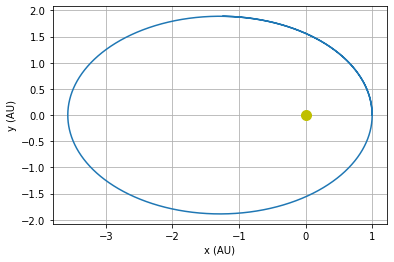

In [114]:
planetPlot(xelip[:,0], xelip[:,1], "x (AU)", "y (AU)")

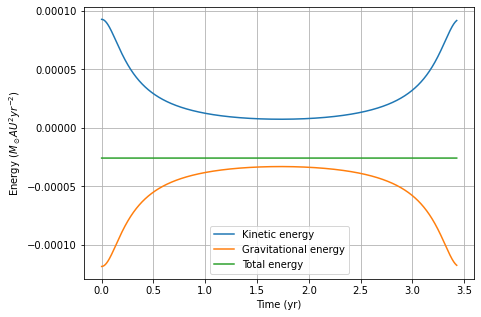

In [115]:
# energies
# find kinetic, gravitational, and total energies for each time step, using the mass as the mass of earth in solar masses

mearth = Mearthkg/Msunkg
# kinetic 
K = 0.5*mearth*(velip[:,0]**2 + velip[:,1]**2)
# gravitational
V = - G*Msun*mearth/np.sqrt(xelip[:,0]**2 + xelip[:,1]**2)
# total
E = K + V
# orbital period to slice graphs
# This is messy but it converts the np.where output into a bare integer which I have used for the graphs
Tcut = np.array(np.where(xelip[100:,0] == max(xelip[100:,0])))[0,0]
T = t[Tcut]

PhysPlot.multiplot(t[: Tcut], [K[: Tcut], V[: Tcut], E[: Tcut]], ["Kinetic energy", "Gravitational energy", "Total energy"], r"Time (yr)", r"Energy ($M_\odot AU^2 yr^{-2}$)")

$$ \vec{L} = m \vec{r} \times \vec{v},$$

$$ \vec{L} =  	
\begin{vmatrix}
\hat{i} & \hat{j} & \hat{k}\\
r_x & r_y & r_z\\
v_x & v_y & v_z
\end{vmatrix},$$

$$ r_z = v_z = 0, $$

$$ \vec{L} = m (\ r_x v_y - r_y v_x )\ \hat{k}  .$$

(0.0, 3e-05)

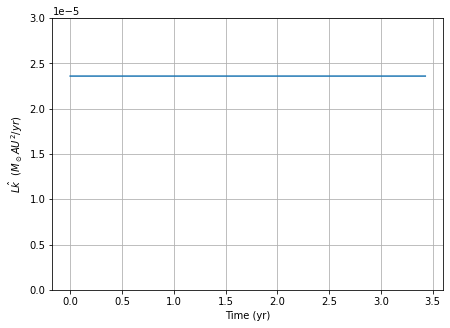

In [116]:
# angular momentum

L = mearth * (xelip[:,0] * velip[:,1] - xelip[:,1] * velip[:,0])

# PhysPlot.plot(t[: 1265], L[: 1265], r"Time (yr)", r"L (something)")
# need to scale axes to make a nice straight line

plt.figure(figsize=(7, 5))
plt.plot(t[: Tcut], L[: Tcut])
plt.xlabel("Time (yr)")
plt.ylabel("$L \hat{k}$  $(M_\odot AU^2 / yr)$")
plt.grid()
ax = plt.gca()
ax.set_ylim(0, 0.00003)


Using the geomentry of the elipse, $a$ is the furthest distance beween two points passing through the centre of the elipse, and $b$ is the closest. So,

$$a = \frac{x_{max} - x_{min}}{2};$$

and

$$b = \frac{y_{max} - y_{min}}{2}.$$

From these using,

$$ \epsilon^2 = \frac{ a^2 - b^2}{a^2} ,$$
$$L^2 = GMm^2 a(1-\epsilon^2),$$
$$E = -\frac{GMm}{2a}.$$

The eccentricity $\epsilon$, angular momentum $L$, and energy $E$ can be found.


In [117]:
a = (xelip[:,0].max() - xelip[:,0].min())/2
b = (xelip[:,1].max() - xelip[:,1].min())/2

epsilon = np.sqrt((a**2 - b**2)/a**2)
Ltheor = np.sqrt(G*Msun*(mearth**2)*a*(1 - epsilon**2))
Etheor = - G*Msun*mearth/(2*a)

print("Semi-major axis a =", round(a,4), "AU")
print("Semi-minor axis b =", round(b,4), "AU")
print("Eccentricity ϵ =", round(epsilon,4))
print("Theoretical energy E =", round(Etheor,8), "which is equal to energy from velocity", round(E[0],8))
print("Theoretical angular momentum L =", round(Ltheor, 8), "which is equal to an angular momentum from position", round(L[0],8))

Semi-major axis a = 2.2858 AU
Semi-minor axis b = 1.8899 AU
Eccentricity ϵ = 0.5625
Theoretical energy E = -2.594e-05 which is equal to energy from velocity -2.594e-05
Theoretical angular momentum L = 2.359e-05 which is equal to an angular momentum from position 2.359e-05


#### 2) Law of Equal Areas: An area swept by a line connecting the Sun and the planet over a constant time period will always be the same (1 point). 
Some geometry will be needed here. Remember how we calculated an increment of area from $\vec{r}$ and $d\vec{r}$ in class. There are two possible ways to prove this law:
1) Calculate the increment of area swept for each time step and plot this as a function of time. Do you get a constant?

2) Calculate the total area swepts for two equal chunks of time at two different parts of the orbit. Do you get the same total?

For this problem I calculated the area swept out by the planet for each time step swept out over the course of one orbit. For a planet that moves distance $d\vec{r}$ in a timestep $dt$ and sweeps out an angle $d\vec{\theta}$ the area swept out in that time is:

$ \frac{dA}{dt} = \frac{1}{2} r dr,$

Area calculated from the difference in radius dr, even reducing the timestep dt did not eliminate the errors


(0.0, 0.0015)

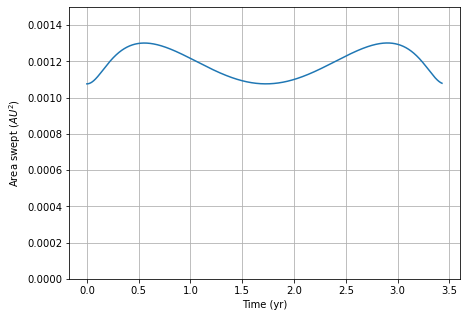

In [118]:
r = np.sqrt(xelip[:,0]**2 + xelip[:,1]**2)
theta = np.arccos(xelip[:,0]/r)

Ar = np.zeros(len(t))
Atheta = np.zeros(len(t))

for i in range((len(r) - 1)):
    dr = np.sqrt((xelip[i+1,0] - xelip[i,0])**2 + (xelip[i+1,1] - xelip[i,1])**2)
    Ar[i] = 0.5*dr*r[i]
    Atheta[i] = 0.5*np.abs(theta[i + 1] - theta[i])*r[i]**2

print("Area calculated from the difference in radius dr, even reducing the timestep dt did not eliminate the errors")
plt.figure(figsize=(7, 5))
plt.plot(t[: Tcut], Ar[: Tcut])
plt.xlabel("Time (yr)")
plt.ylabel("Area swept $(AU^2)$")
plt.grid()
ax = plt.gca()
ax.set_ylim(0, 0.0015) 

# PhysPlot.plot(t[:1265],Ar[:1265],"time (yr)", "area swept from radius (AU)")
# PhysPlot.plot(t[:1265],Atheta[:1265],"time (yr)", "area swept from angle (AU^2)")

Area calculated from difference in angle dθ, this solution has worked correctlyexcept for the error where θ = 0


(0.0, 0.0015)

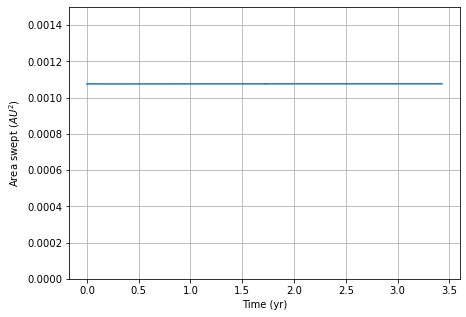

In [119]:
print("Area calculated from difference in angle dθ, this solution has worked correctlyexcept for the error where θ = 0")
plt.figure(figsize=(7, 5))
plt.plot(t[: Tcut], Atheta[: Tcut])
plt.xlabel("Time (yr)")
plt.ylabel("Area swept $(AU^2)$")
plt.grid()
ax = plt.gca()
ax.set_ylim(0, 0.0015)  
    

#### 3) Harmonic Law: The square of the orbital period of the planet is directly proportional to the cube of the semimajor axis of the planets orbit. 
That is:

$$\tau^2 = \frac{4\pi^2}{GM}a^3$$

Getting the orbital period is a little tricky here. Remember that the orbital period should be the time it takes for the initial position and the position at some time $\tau$ be the same as the initial position. However, because of numerical errors, the position after one cycle is not going to coincide perfectly with the initial position.

Using $\tau$ and $a$, show that the equation is satisfied.


The period was found above using these lines:

Tcut = np.array(np.where(xelip[100:,0] == max(xelip[100:,0])))[0,0]

T = t[Tcut]

Which were used to slice the graphs to only show one period. 

To prove this I compared,

$\frac{\tau^2}{a^3},$

found from my data with,

$\frac{4 \pi^2}{G M_\odot}$

and computed a percent difference.

In [120]:
numerical = T**2/a**3
theoretical = 4*np.pi**2/(G*Msun)

print("The numerical constant from my data was", round(numerical,5), "yr^2/AU^3")
print("The nutheoretical constant was", round(theoretical,5), "yr^2/AU^3")

print("The percent difference is", round((theoretical - numerical)/numerical*100,4), "%")

The numerical constant from my data was 0.98422 yr^2/AU^3
The nutheoretical constant was 1.00001 yr^2/AU^3
The percent difference is 1.6042 %


Here is what my plots look like (don't worry about making the dots representing the planet and the star):

<img src="images/p4_p2a.jpg" width=500 style="float:left"/>
<img src="images/p4_p2b.jpg" width=500 style="float:center"/>
<img src="images/p4_p2c.jpg" width=500 style="float:left"/>
<img src="images/p4_p2d.jpg" width=500 style="float:center"/>

## Problem 3. Solve Problem C6.2 (2 points)
Solve problem C6.2 from the textbook.

$r_p = r_0 = 6.6 \times 10^6 m$

$\epsilon_0 = 0.9656$

$\epsilon_f = \frac{1}{7}$

With a small impulse which reduces the velocity at perogee $v_1$ by $\delta = 0.01$ each time it passes through perogee.

a) the angular momentum of each orbit is the same, the overall angular momentum $L$ will be reduced from $L_0 = mv_0r_0$ to $L_f = mr_0(v_0 - n\delta)$ after $n$ orbits. Using: 

$\frac{L_0^2}{G M_E m^2} = a_0(1 - \epsilon_0^2)$

and

$ a_f = \frac{r_f}{1 - \epsilon_f} = \frac{r_0}{1 - \epsilon_f}.$

We get:

$\frac{L_f^2}{G M_E m^2} = \frac{r_0(1 - \epsilon_f^2)}{1 - \epsilon_f},$

$(v_0 - v_0 n\delta)^2 = \frac{G M_E(1 - \epsilon_f^2)}{r_0(1 - \epsilon_f)},$

$v_0^2(1 - n\delta)^2 = \frac{G M_E(1 - \epsilon_f^2)}{r_0(1 - \epsilon_f)},$

$1 - n \delta = \sqrt{\frac{G M_E(1 - \epsilon_f^2)}{v_0^2 r_0 (1 - \epsilon_f)}},$

$n\delta = 1 - \sqrt{\frac{G M_E(1 - \epsilon_f^2)}{v_0^2 r_0 (1 - \epsilon_f)}},$

$n = \frac{1}{\delta} - \sqrt{\frac{G M_E(1 - \epsilon_f^2)}{\delta^2 v_0^2 r_0 (1 - \epsilon_f)}},.$

Find the semi-major axis $a$ and inital velocity $v_0$ from the given inital conditions, and use these to find $n$:

$ a_0 = \frac{r_0}{1 - \epsilon_0}$

$v_0^2 = \frac{G M_E a_0(1 - \epsilon_0^2)}{r_0^2}$

In [121]:
r0 = 6.6*10**6 # m
epsilon0 = 0.9656 #
epsilonf = 1/7
delta = 0.01

a0 = r0/(1 - epsilon0)

v0 = np.sqrt(Gconst*Mearthkg*a0*(1 - epsilon0**2)/r0**2)

nanalitical = (1 - np.sqrt(Gconst*Mearthkg*(1 - epsilonf**2)/(v0**2*r0*(1 - epsilonf))))/delta

print("Anylitical n =", nanalitical)

Anylitical n = 23.748498188053766


The integration will consist of a large nummber of orbits, I have chosen a timestep $dt_E = 15 s$ for computing this integral using the rk2 method 

In [122]:
# planet plot which makes a large circle where earth is
earthrad = 6.4*10**3

def earthplot(xAxis, yAxis, xTitle, yTitle):
    plt.figure(figsize=(10, 10))
    # create earth
#     plt.Circle((earthrad, earthrad), 0.2, color='blue')
    plt.plot(0, 0, color = 'g', marker='.', markersize=20)
    plt.plot(xAxis, yAxis)
#     multy_x = isinstance(xAxis[0], (list, np.ndarray))
#     if len(xAxis) == 1:
#         for ii in range(len(yAxes)):
#             if multy_x:
#                 # Assume there is an idependent axis for each dependent one
#                 plt.plot(xAxis[ii], yAxes[ii], label=ylbls[ii])
#             else:
#                 # Assume all plots share the same dependent axis
#                 plt.plot(xAxis, yAxes[ii], label=ylbls[ii])
#     else:
#         plt.plot(xAxis, yAxes, label = ylbls)
        
    plt.xlabel(xTitle)
    plt.ylabel(yTitle)
    plt.grid()
#     plt.legend(loc="best")

In [123]:
# newtons law of gravitation using earths mass

def NLGearth(vi,xi,ti):
    a = np.zeros(len(xi))
    a[0] = - Gconst * Mearthkg * xi[0] / (xi[0]**2 + xi[1]**2) ** (3/2)
    a[1] = - Gconst * Mearthkg * xi[1] / (xi[0]**2 + xi[1]**2) ** (3/2)
    return a

Inital orbit is 0, has not had any drag from the athmosphere
Orbit 0  ϵ = 0.9655254814220423
Orbit 1  ϵ = 0.926416995886602
Orbit 2  ϵ = 0.8880918532363986
Orbit 3  ϵ = 0.8505216105820064
Orbit 4  ϵ = 0.8137004750115002
Orbit 5  ϵ = 0.7776120638748546
Orbit 6  ϵ = 0.7422584842413786
Orbit 7  ϵ = 0.7075810677924865
Orbit 8  ϵ = 0.6736075809448149
Orbit 9  ϵ = 0.6403071635113071
Orbit 10  ϵ = 0.6076861996031901
Orbit 11  ϵ = 0.5756935702863957
Orbit 12  ϵ = 0.544333580443616
Orbit 13  ϵ = 0.5136009847893884
Orbit 14  ϵ = 0.4834848602078964
Orbit 15  ϵ = 0.45396347731869635
Orbit 16  ϵ = 0.4250248566390751
Orbit 17  ϵ = 0.39667648124453736
Orbit 18  ϵ = 0.3689003613430969
Orbit 19  ϵ = 0.34165430423682697
Orbit 20  ϵ = 0.3149350555112945
Orbit 21  ϵ = 0.2887799749788639
Orbit 22  ϵ = 0.26311274006454666
Orbit 23  ϵ = 0.23801303019620568
Orbit 24  ϵ = 0.21333673291965116
Orbit 25  ϵ = 0.18922467957707234
Orbit 26  ϵ = 0.16555940328707086
Orbit 27  ϵ = 0.14229834019076426
b) the number of o

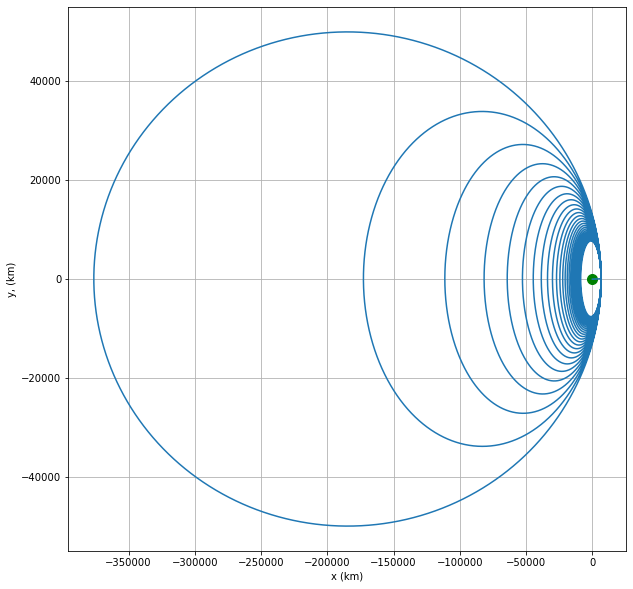

In [124]:
dtE = 15 # s
tfE = 31*24*3600 # 1 month

# time array
tE = np.arange(0,tfE,dtE)
# 2D arrays for position and velocity in x and y
r = np.zeros((len(tE),2))
v = np.zeros((len(tE),2))

# inital conditions as calculated above
r[0,:] = [r0, 0]
v[0,:] = [0,v0]
n = 0

a = np.zeros(30) # semimajor axis a
b = np.zeros(30) # semiminor axis b
vap = np.zeros(30) # velocity at aposis
epsilon = np.zeros(30)

print("Inital orbit is 0, has not had any drag from the athmosphere")
# numerical for loop
for i in range(len(tE) - 1):
    r[i + 1,:], v[i + 1,:] = rk2(NLGearth, r[i,:], v[i,:], tE[i], dtE)
    # subtract the impulse to the velocity when the satilite passes through the athmosphere 
    # crosses the x-axis with positive y velocity
    # get apoapsis distance when crossing the x axis from positive to negative
    if r[i, 1] > 0 and r[i + 1, 1] < 0:
        r1 = r[i + 1, 0]
        vap[n] = - v[i + 1, 1]
    elif  r[i, 1] < 0 and r[i + 1, 1] > 0:
        # apply impuse to velocity
        v[i + 1,1] = v[i + 1,1] - v[i + 1,1]*delta
        # get semi-major axis of previous orbit
        a[n] = (r[i + 1, 0] - r1)/2
        # get semi-minor axis b using a[n] and epsilon[n]
        b[n] = np.sqrt(a[n]**2 - epsilon[n]**2*a[n]**2)
        # compute eccentricity and check if it's below 1/7
        epsilon[n] = 1 - r[i + 1, 0]/a[n]
        print("Orbit", n," ϵ =",epsilon[n])
        if epsilon[n] < epsilonf:
            print("b) the number of orbits to circularize is n =",n)
            print("c) the time to circularize is:",round(tE[i]/(3600*24), 2),"d")
            break
        # add 1 to orbit number for next orbit
        n = n + 1
        
# PhysPlot.plot(r[:,0]*10**(-3), r[:,1]*10**(-3), "x (km)", "y, (km)")
earthplot(r[:,0]*10**(-3), r[:,1]*10**(-3), "x (km)", "y, (km)")

d) ratio of semimajor axis to semiminor axis using the arrays for a and b from the numerical loop I divided a by b to get the ratio and graphed it from n = 0 to 28. The ration was constant thougout the circularization by drag.

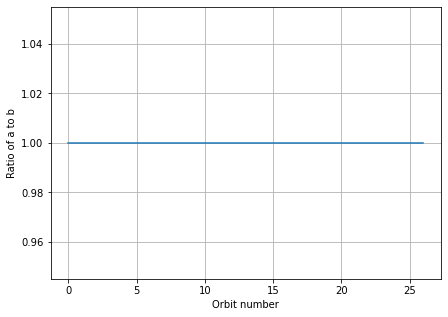

In [125]:
PhysPlot.plot(range(n),a[:n]/b[:n], "Orbit number", "Ratio of a to b")

e) The inital apoapsis velocity in the highly eliptical orbit was: 191.09 m/s; the final apoapsis velocity was,  6234.6 m/s


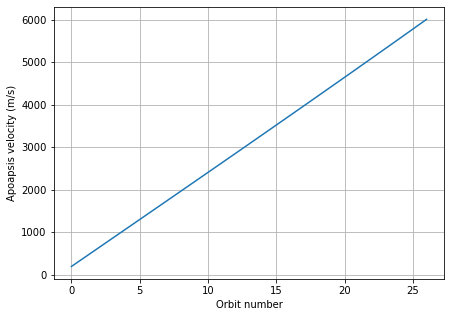

In [126]:
print("e) The inital apoapsis velocity in the highly eliptical orbit was:", round(vap [0],2),"m/s; the final apoapsis velocity was, ", round(vap[n],2), "m/s")
PhysPlot.plot(range(n),vap[:n],"Orbit number","Apoapsis velocity (m/s)")

The final aposis velocity was much higher than the inital one even though the only force acting on it was the drag because the drag is only applied at periapsis which reduces the periapsis velocity and decreases the distance to apoapsis $r_1$ from the conservation of angular momentum since the distance to apoapsis is decreased the speed there must increase to have the same anular momentum as at periapsis.